### Import libs

In [1]:
# ! pip install sklearn
# ! pip install pca

In [2]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from pca import pca


seed = 42
pd.set_option('display.max_columns', None)

### Read data

In [3]:
df = pd.read_csv('datalake/trusted/df_trusted.csv')

In [4]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,date_customer,age,current_date,client_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012-09-04,65,2022-02-10,3446
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014-03-08,68,2022-02-10,2896
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013-08-21,57,2022-02-10,3095
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014-02-10,38,2022-02-10,2922
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014-01-19,41,2022-02-10,2944


### Data transformation

In [5]:
le = preprocessing.LabelEncoder()

In [6]:
df.client_days.describe()

count    2240.000000
mean     3136.582143
std       202.122512
min      2783.000000
25%      2963.750000
50%      3138.500000
75%      3312.000000
max      3482.000000
Name: client_days, dtype: float64

In [7]:
df.recency.describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: recency, dtype: float64

In [9]:
le.fit(df.education)
df['education_encoded'] = le.transform(df.education)

le.fit(df.marital_status)
df['marital_status_encoded'] = le.transform(df.marital_status)


bins = [20, 40, 60, 80, 100, 130]
labels=[0, 1, 2, 3, 4]
df['age_encoded'] = pd.cut(df['age'], bins=bins, labels=labels).astype(int)

bins = [2780, 2963, 3138, 3312, 3485]
labels=[0, 1, 2, 3]
df['client_days_encoded'] = pd.cut(df['client_days'], bins=bins, labels=labels).astype(int)

bins = [-1, 25, 50, 75, 100]
labels=[0, 1, 2, 3]
df['recency_encoded'] = pd.cut(df['recency'], bins=bins, labels=labels).astype(int)

In [10]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,date_customer,age,current_date,client_days,education_encoded,marital_status_encoded,age_encoded,client_days_encoded,recency_encoded
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012-09-04,65,2022-02-10,3446,2,4,2,3,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014-03-08,68,2022-02-10,2896,2,4,2,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013-08-21,57,2022-02-10,3095,2,5,1,1,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014-02-10,38,2022-02-10,2922,2,5,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014-01-19,41,2022-02-10,2944,4,3,1,0,3


In [11]:
def plot_data(df, column_list, name):
    print(name)
    df.hist(column_list, figsize=(18,15));

Categorical data


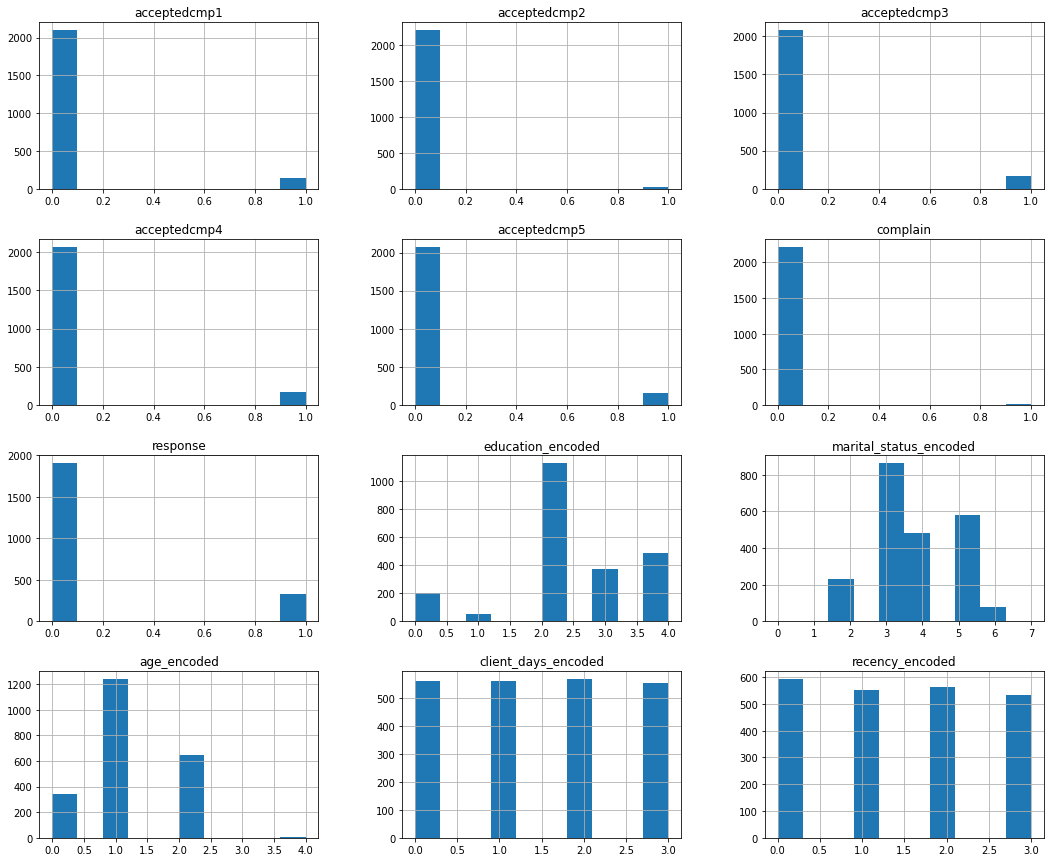

In [13]:
categorical_columns = ['acceptedcmp1', 'acceptedcmp2','acceptedcmp3', 
                       'acceptedcmp4', 'acceptedcmp5', 
                       'complain', 'response', 'education_encoded',
                       'marital_status_encoded', 'age_encoded', 'client_days_encoded', 
                       'recency_encoded']

plot_data(df, categorical_columns, 'Categorical data')

In [14]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,date_customer,age,current_date,client_days,education_encoded,marital_status_encoded,age_encoded,client_days_encoded,recency_encoded
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012-09-04,65,2022-02-10,3446,2,4,2,3,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014-03-08,68,2022-02-10,2896,2,4,2,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013-08-21,57,2022-02-10,3095,2,5,1,1,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014-02-10,38,2022-02-10,2922,2,5,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014-01-19,41,2022-02-10,2944,4,3,1,0,3


In [15]:
data = df.drop(['education', 'marital_status', 
                'year_birth', 'z_costcontact', 'z_revenue', 
                'client_days', 'id','dt_customer', 'date_customer', 
                'current_date'], axis=1)

In [16]:
data.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,education_encoded,marital_status_encoded,age_encoded,client_days_encoded,recency_encoded
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,2,4,2,3,2
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,2,4,2,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,2,5,1,1,1
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,2,5,0,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,4,3,1,0,3


In [17]:
data.to_csv('datalake/refined/df_refined.csv', index=False)

In [18]:
scaler = preprocessing.MinMaxScaler()
df_refined = scaler.fit_transform(data)

### Classification model - KMeans and PCA

Reference:
https://scikit-learn.org/stable/modules/clustering.html

https://github.com/erdogant/pca

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [28] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [18] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [28] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[18]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


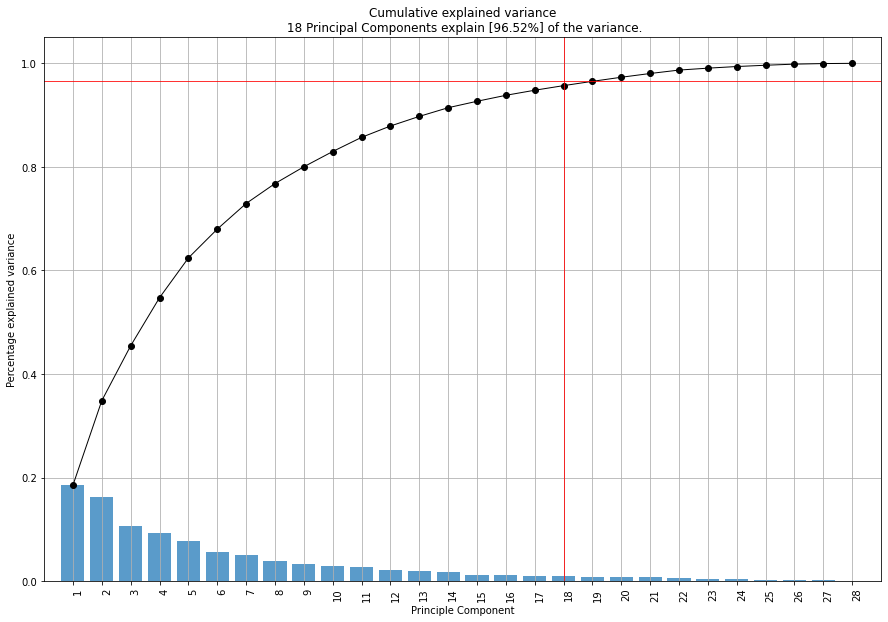

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 18 Principal Components explain [96.52%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [19]:
model = pca()

out = model.fit_transform(df_refined);

model.plot()

[pca] >Plot PC1 vs PC2 with loadings.


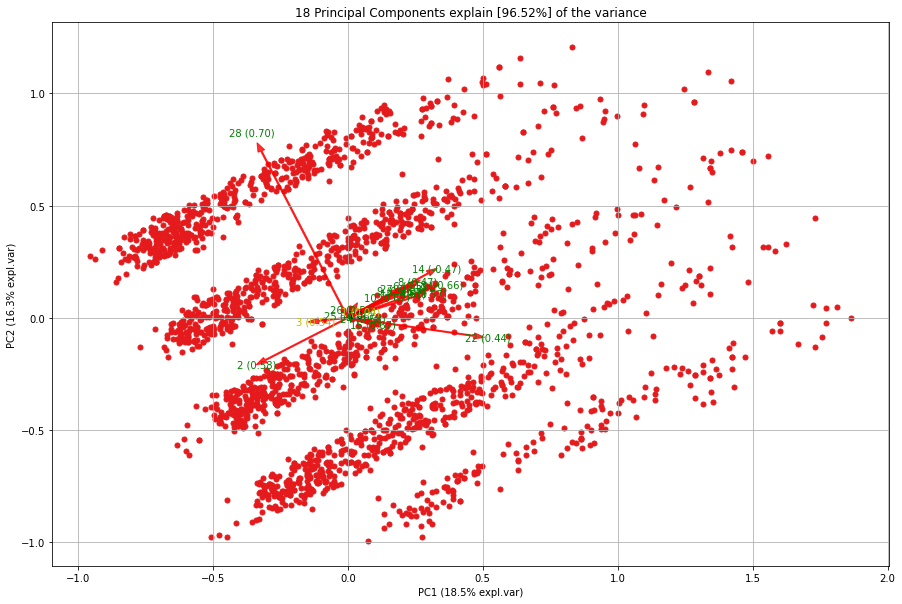

In [20]:
ax = model.biplot(n_feat=18, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


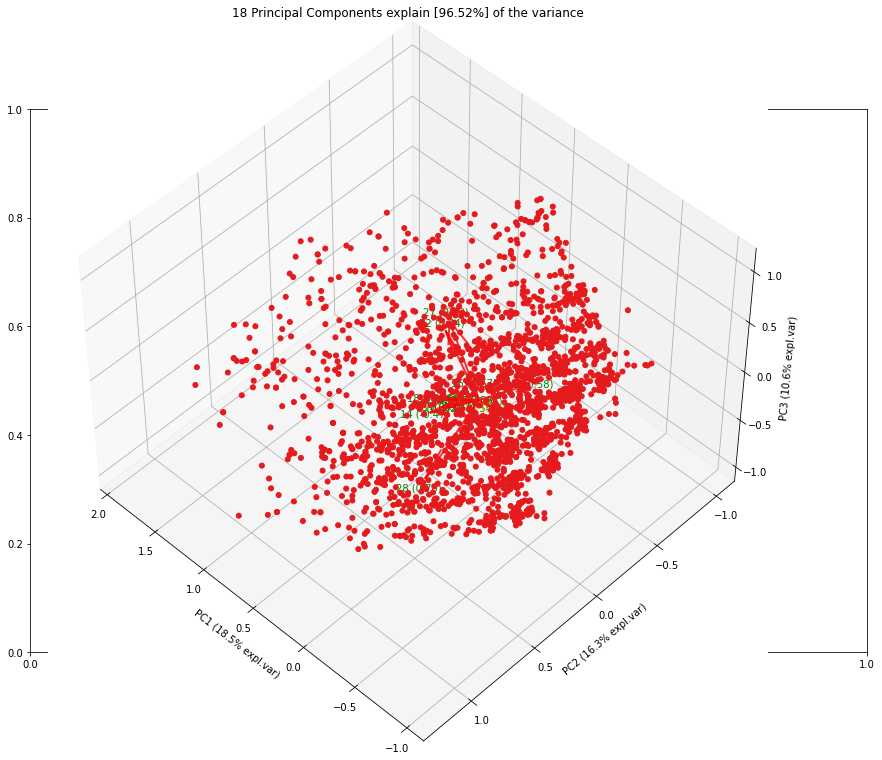

In [21]:
ax = model.biplot3d(n_feat=18, legend=False)

In [22]:
def pooler(df_refined, iters, max_features=1000):

    pca = PCA(n_components = 18)
    pca.fit(df_refined)
    df_pca = pca.transform(df_refined)
    
    # pooler model
    sse = []
    models = []
    for k in iters:
        model = KMeans(n_clusters=k, random_state=seed).fit(df_pca)
        models.append(model)
        sse.append(model.inertia_)
        model.predict(df_pca)
        
    return models, sse, df_pca

def get_model(models, k):
    c = ((k - 2) // 2)
    return models[c]

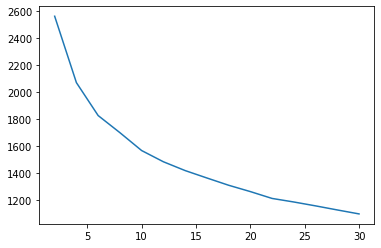

In [23]:
iters = range(2, 30 + 1, 2)
models, sse, df_pca = pooler(df_refined, iters)
plt.plot(iters, sse)
plt.show()

In [24]:
df_kmeans = pd.DataFrame(df_pca)
k = 7
model = get_model(models, k)
model.predict(df_pca);

In [25]:
df['cluster'] = model.predict(df_pca)

In [26]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,date_customer,age,current_date,client_days,education_encoded,marital_status_encoded,age_encoded,client_days_encoded,recency_encoded,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012-09-04,65,2022-02-10,3446,2,4,2,3,2,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014-03-08,68,2022-02-10,2896,2,4,2,0,1,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013-08-21,57,2022-02-10,3095,2,5,1,1,1,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014-02-10,38,2022-02-10,2922,2,5,0,0,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014-01-19,41,2022-02-10,2944,4,3,1,0,3,1


In [27]:
joblib.dump(model, 'datalake/model/kmeans.joblib')
df.to_csv('datalake/model/kmeans.csv')

### Analysis

In [28]:
df.groupby('cluster').count()['id']

cluster
0    218
1    552
2    426
3    504
4    389
5    151
Name: id, dtype: int64

<AxesSubplot:ylabel='id'>

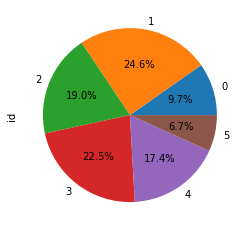

In [29]:
df.groupby('cluster').count()['id'].plot(kind='pie', autopct="%.1f%%")

In [30]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,date_customer,age,current_date,client_days,education_encoded,marital_status_encoded,age_encoded,client_days_encoded,recency_encoded,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012-09-04,65,2022-02-10,3446,2,4,2,3,2,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014-03-08,68,2022-02-10,2896,2,4,2,0,1,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013-08-21,57,2022-02-10,3095,2,5,1,1,1,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014-02-10,38,2022-02-10,2922,2,5,0,0,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014-01-19,41,2022-02-10,2944,4,3,1,0,3,1


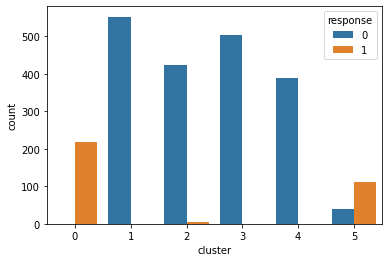

In [31]:
sns.countplot(x="cluster", hue='response', data=df);

In [34]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,date_customer,age,current_date,client_days,education_encoded,marital_status_encoded,age_encoded,client_days_encoded,recency_encoded,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012-09-04,65,2022-02-10,3446,2,4,2,3,2,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014-03-08,68,2022-02-10,2896,2,4,2,0,1,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013-08-21,57,2022-02-10,3095,2,5,1,1,1,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014-02-10,38,2022-02-10,2922,2,5,0,0,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014-01-19,41,2022-02-10,2944,4,3,1,0,3,1


In [57]:
columns = ['income', 'kidhome', 'teenhome', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'complain', 'response', 'age', 'client_days', 'education_encoded',
       'marital_status_encoded', 'age_encoded', 'client_days_encoded', 'recency_encoded']

In [88]:
# education_encoded = 0 = 2n Cycle
# education_encoded = 1 = Basic
# education_encoded = 2 = Graduation
# education_encoded = 3 = Master
# education_encoded = 4 = PhD

# marital_status_encoded = 0 = Absurd
# marital_status_encoded = 1 = Alone
# marital_status_encoded = 2 = Divorced
# marital_status_encoded = 3 = Married
# marital_status_encoded = 4 = Single
# marital_status_encoded = 5 = Together
# marital_status_encoded = 6 = Widow
# marital_status_encoded = 7 = YOLO

# age_encoded = 0 = 20-40
# age_encoded = 1 = 40-60
# age_encoded = 2 = 60-80
# age_encoded = 3 = 80-100
# age_encoded = 4 = 100-130

# client_days_encoded = 0 = 2780 - 2963
# client_days_encoded = 1 = 2963 - 3138
# client_days_encoded = 2 = 3138 - 3312
# client_days_encoded = 3 = 3312 - 3485

# recency_encoded = 0 = -1 - 25
# recency_encoded = 1 = 25 - 50
# recency_encoded = 2 = 50 - 75
# recency_encoded = 3 = 75 - 100

#### Cluster 0

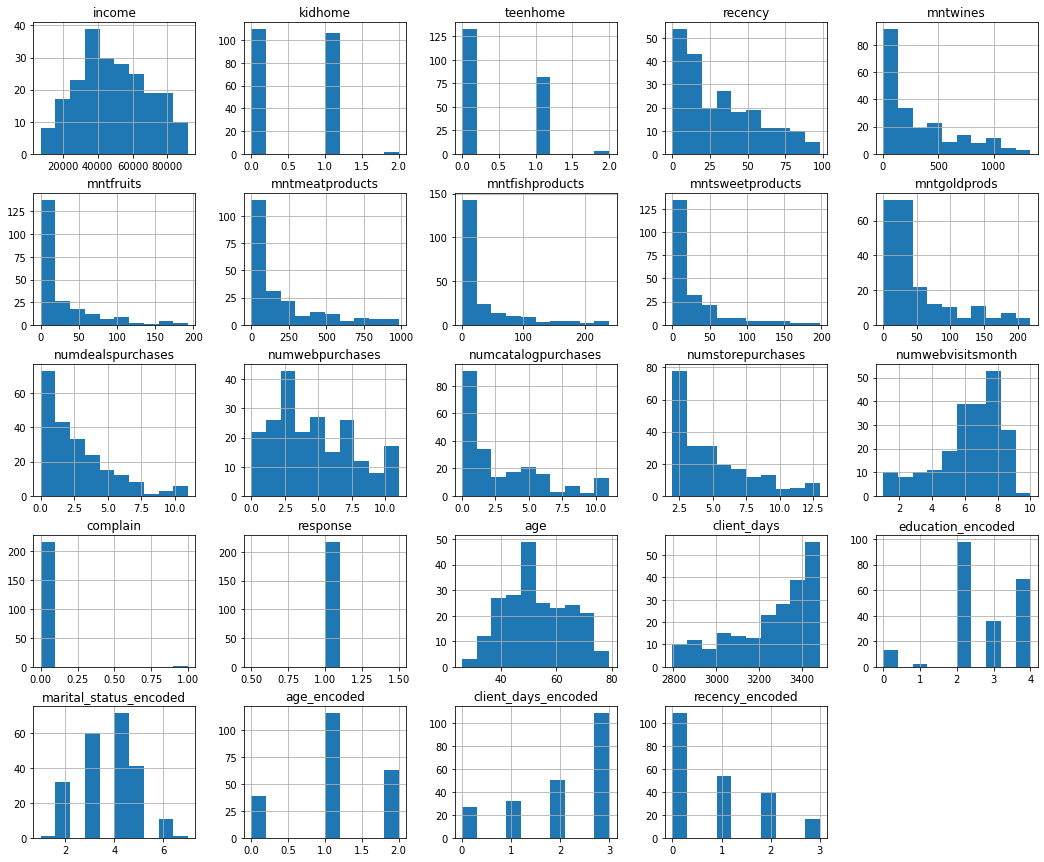

In [58]:
df[df['cluster']==0].hist(columns, figsize=(18,15));

Renda na casa dos 30000,00

client_days_encoded = 3 = 3312 - 3485

age_encoded = 1 = 40-60

marital_status_encoded = 4 = Single

education_encoded = 2 = Graduation

#### Cluster 1

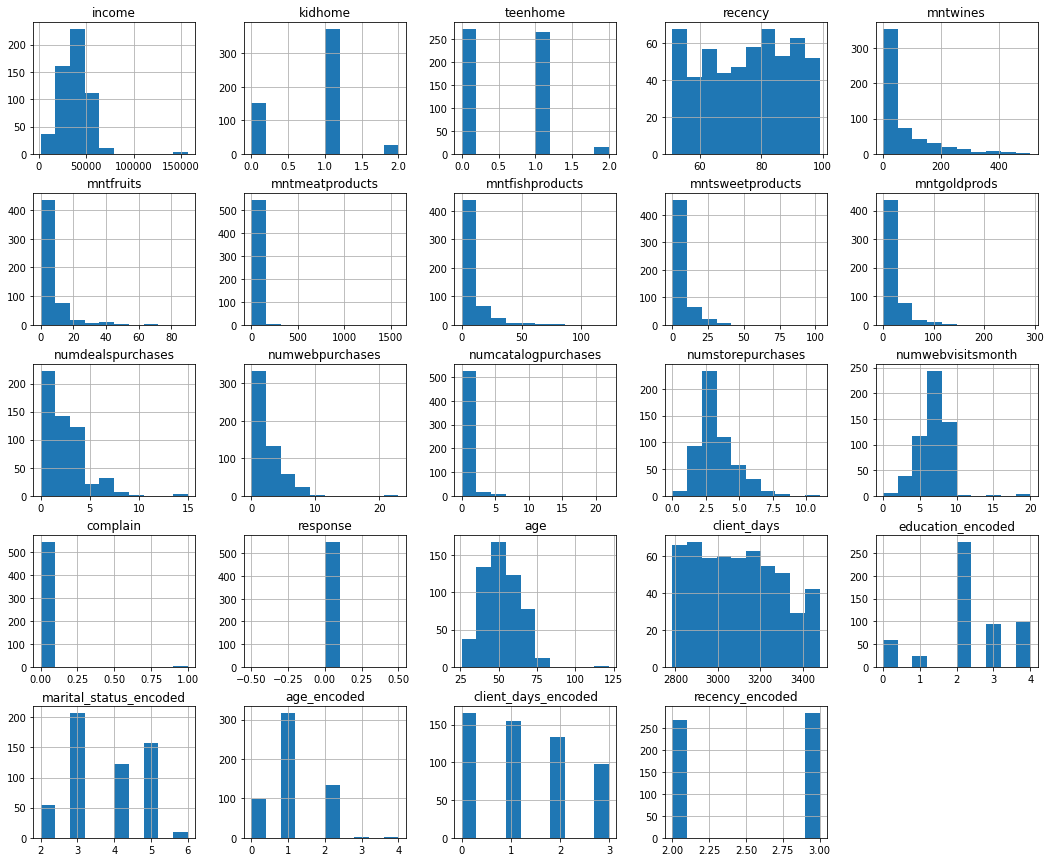

In [82]:
df[df['cluster']==1].hist(columns, figsize=(18,15));

Renda na casa dos 40000,00

client_days_encoded = 0 = 2780 - 2963

age_encoded = 1 = 40-60

marital_status_encoded = 3 = Married

education_encoded = 2 = Graduation

#### Cluster 2

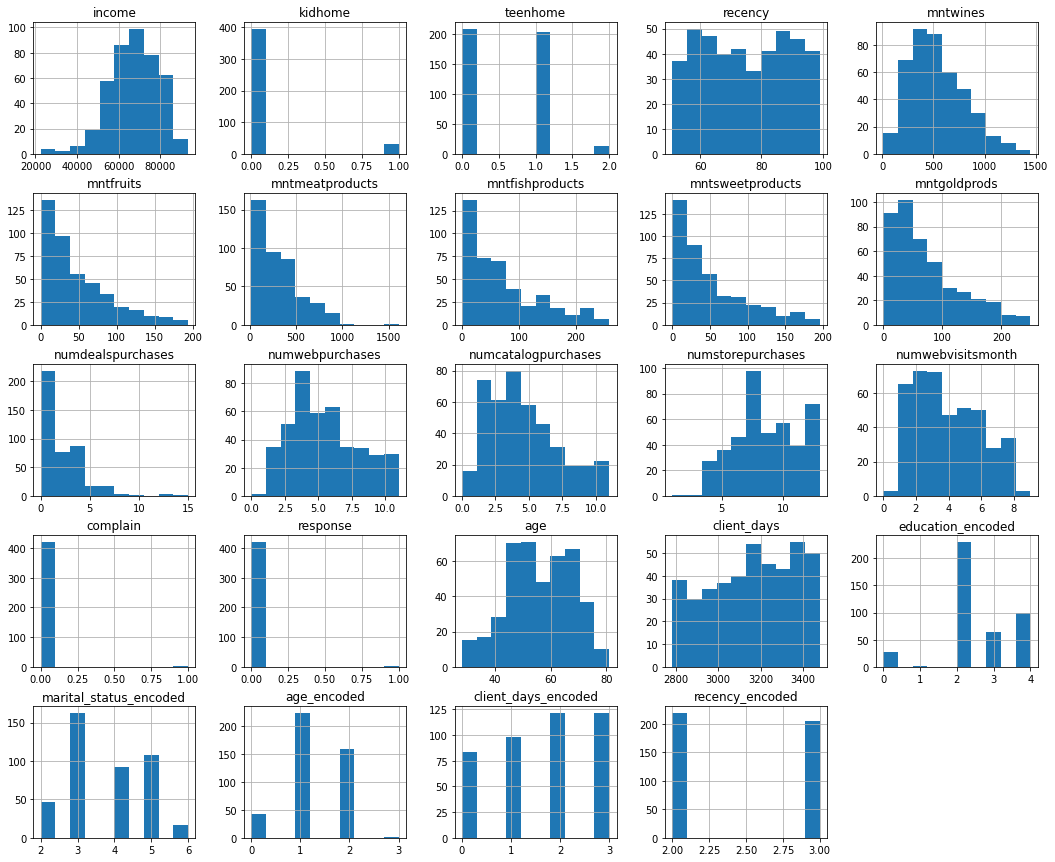

In [83]:
df[df['cluster']==2].hist(columns, figsize=(18,15));

Renda na casa dos 70000,00

client_days_encoded = 3 e 2 = 3138 - 3485

age_encoded = 1 = 40-60

marital_status_encoded = 3 = Married

education_encoded = 2 = Graduation

#### Cluster 3

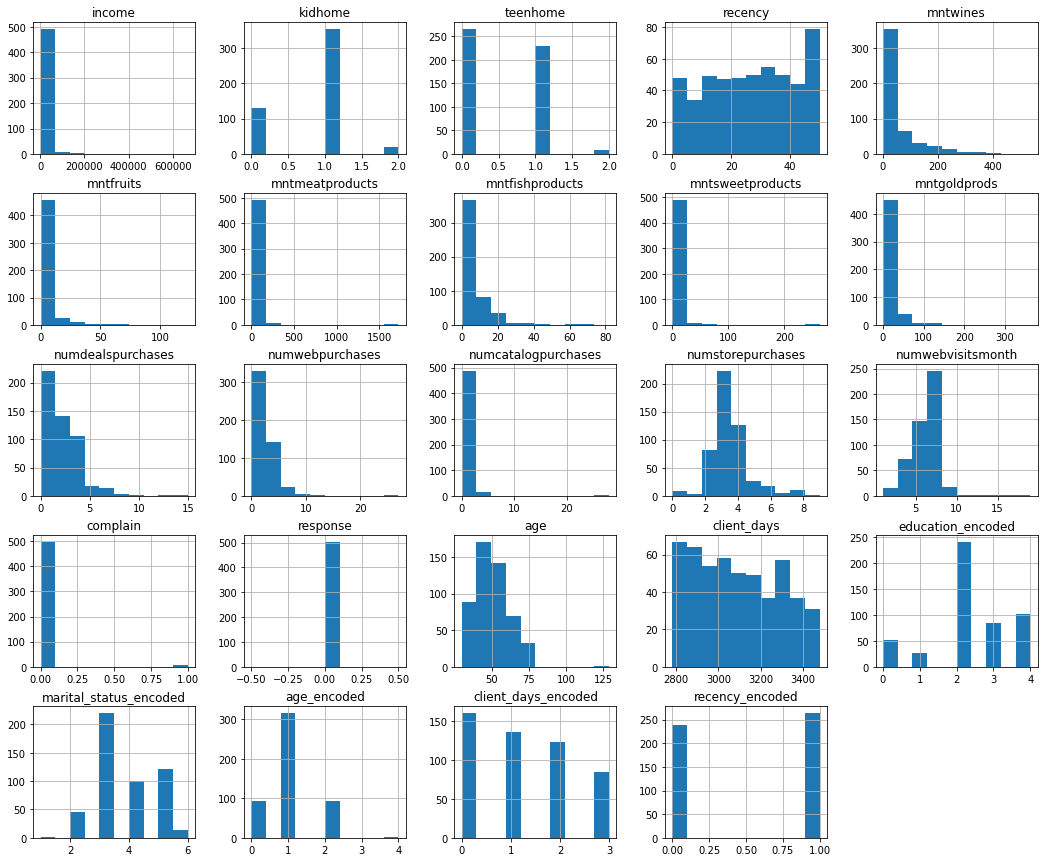

In [85]:
df[df['cluster']==3].hist(columns, figsize=(18,15));

Renda na casa dos 10000,00

client_days_encoded = 0 = 2780 - 2963

age_encoded = 1 = 40-60

marital_status_encoded = 3 = Married

education_encoded = 2 = Graduation

#### Cluster 4

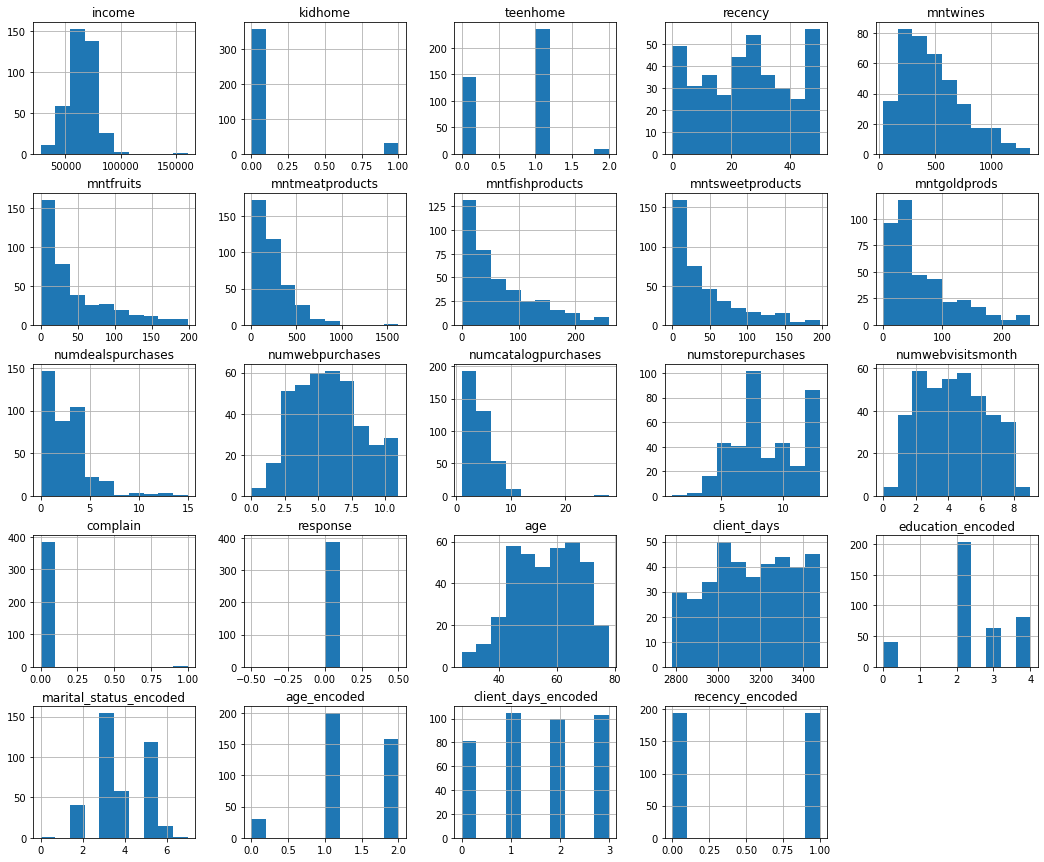

In [86]:
df[df['cluster']==4].hist(columns, figsize=(18,15));

Renda na casa dos 60000,00

client_days_encoded = 1,2 3 = 2963 - 3485

age_encoded = 1 = 40-60

marital_status_encoded = 3 = Married

education_encoded = 2 = Graduation 

#### Cluster 5

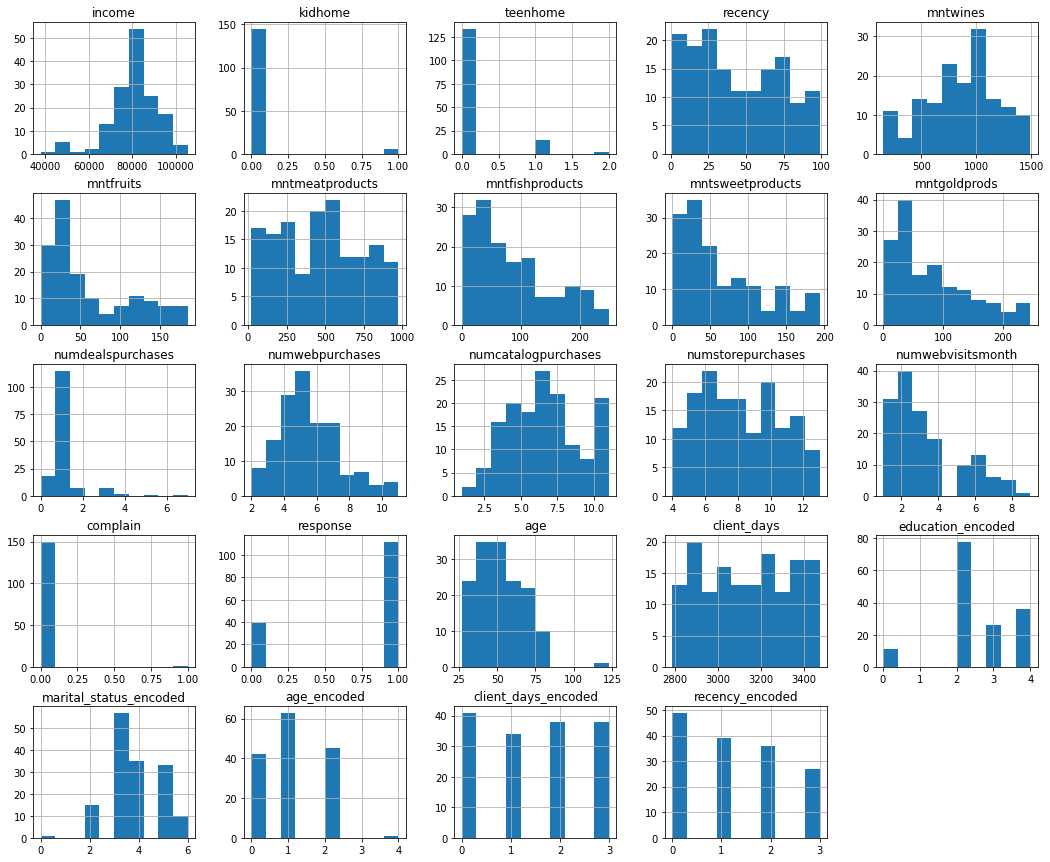

In [87]:
df[df['cluster']==5].hist(columns, figsize=(18,15));

Renda na casa dos 80000,00

client_days_encoded = 0 = 2780 - 2963

age_encoded = 1 = 40-60

marital_status_encoded = 3 = Married

education_encoded = 2 = Graduation 